In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# Load the data set
# Set the delimiter as ';' and skip line 3149
import pandas as pd
org = pd.read_csv('Github_organisation.csv', error_bad_lines=False)
user = pd.read_csv('GIthub_user.csv', error_bad_lines=False)

In [3]:
org

,Name,Main_Language,Location,Date,Pushed_to_repos,Main_languages,Tota_issues,Total_forks,Total_stars,Followers,Following
0,google,C++,NaN,18/01/2012,100,17,12700,49918,253737,0,0
1,Microsoft,TypeScript,"Redmond, WA",11/12/2013,100,21,25812,61549,393911,0,0
2,facebook,C++,"Menlo Park, California",2/04/2009,100,15,12852,136421,757326,0,0
3,apache,Java,NaN,18/01/2009,100,15,15336,136559,307848,0,0
4,alibaba,Java,"Hangzhou, China",12/07/2012,100,16,8821,71863,299913,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,mongodb,Go,NaN,9/01/2009,100,20,971,17360,55291,0,0
96,django,Python,Internet,7/10/2008,19,4,616,23857,59380,0,0
97,mui-org,JavaScript,the browser,15/11/2017,6,2,525,16859,59509,0,0
98,graphql,JavaScript,"Menlo Park, CA",20/06/2015,18,5,660,6494,58520,0,0


In [4]:
user

,Name,Main_Language,Location,Date,Pushed_to_repos,Main_languages,Tota_issues,Total_forks,Total_stars,Followers,Following
0,sindresorhus,JavaScript,NaN,21/12/2009,100,4,1161,29833,280382,37834,51
1,996icu,NaN,NaN,26/03/2019,0,0,16772,21113,249723,249709,0
2,kamranahmedse,JavaScript,"Dubai, UAE",2/07/2013,50,9,240,22458,165130,12453,133
3,donnemartin,Python,"Washington, D.C.",15/09/2013,27,7,418,29004,164239,9505,3
4,getify,JavaScript,"Austin, TX",8/11/2009,53,3,338,27090,145876,26733,2
...,...,...,...,...,...,...,...,...,...,...,...
95,defunkt,Ruby,NaN,20/10/2007,90,8,522,5683,36386,20991,210
96,juliangarnier,NaN,Paris,17/12/2011,9,1,142,3085,36433,2342,6
97,greenrobot,Java,Berlin,12/04/2010,16,2,351,7573,36160,5261,0
98,vsouza,Go,Brazil,17/11/2010,30,9,6,6119,36080,1121,298


In [5]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             100 non-null    object
 1   Main_Language    97 non-null     object
 2   Location         87 non-null     object
 3   Date             100 non-null    object
 4   Pushed_to_repos  100 non-null    int64 
 5   Main_languages   100 non-null    int64 
 6   Tota_issues      100 non-null    int64 
 7   Total_forks      100 non-null    int64 
 8   Total_stars      100 non-null    int64 
 9   Followers        100 non-null    int64 
 10  Following        100 non-null    int64 
dtypes: int64(7), object(4)
memory usage: 8.7+ KB


In [6]:
org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             100 non-null    object
 1   Main_Language    100 non-null    object
 2   Location         63 non-null     object
 3   Date             100 non-null    object
 4   Pushed_to_repos  100 non-null    int64 
 5   Main_languages   100 non-null    int64 
 6   Tota_issues      100 non-null    int64 
 7   Total_forks      100 non-null    int64 
 8   Total_stars      100 non-null    int64 
 9   Followers        100 non-null    int64 
 10  Following        100 non-null    int64 
dtypes: int64(7), object(4)
memory usage: 8.7+ KB


In [7]:
user.describe()

,Pushed_to_repos,Main_languages,Tota_issues,Total_forks,Total_stars,Followers,Following
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,58.790000,7.400000,660.360000,11348.15000,63025.130000,12953.170000,67.170000
std,33.544873,3.637626,1730.734138,8788.97243,41101.835088,28624.600538,114.511616
min,0.000000,0.000000,6.000000,1528.00000,16102.000000,749.000000,0.000000
25%,29.750000,5.000000,140.500000,4655.75000,39517.000000,2799.750000,3.000000
50%,57.000000,7.000000,352.000000,8474.50000,46999.000000,5276.500000,17.500000
75%,93.000000,9.250000,611.500000,15534.25000,72941.250000,12453.750000,82.000000
max,100.000000,20.000000,16772.000000,36646.00000,280382.000000,249709.000000,820.000000


In [8]:
org.describe()

,Pushed_to_repos,Main_languages,Tota_issues,Total_forks,Total_stars,Followers,Following
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0
mean,76.070000,10.270000,4190.840000,30659.920000,120803.680000,0.0,0.0
std,31.115378,5.622565,5192.803444,30141.115238,103869.682324,0.0,0.0
min,6.000000,1.000000,60.000000,3286.000000,22612.000000,0.0,0.0
25%,52.250000,5.750000,1125.000000,13771.000000,63597.250000,0.0,0.0
50%,99.000000,9.000000,2210.500000,20141.000000,88619.000000,0.0,0.0
75%,100.000000,15.000000,5576.500000,33762.750000,130144.500000,0.0,0.0
max,100.000000,23.000000,30590.000000,162851.000000,757326.000000,0.0,0.0


In [9]:
import numpy as np
# Check missing/invalid values
np.sum(org.isna())

Name                0
Main_Language       0
Location           37
Date                0
Pushed_to_repos     0
Main_languages      0
Tota_issues         0
Total_forks         0
Total_stars         0
Followers           0
Following           0
dtype: int64

In [10]:
np.sum(user.isna())

Name                0
Main_Language       3
Location           13
Date                0
Pushed_to_repos     0
Main_languages      0
Tota_issues         0
Total_forks         0
Total_stars         0
Followers           0
Following           0
dtype: int64

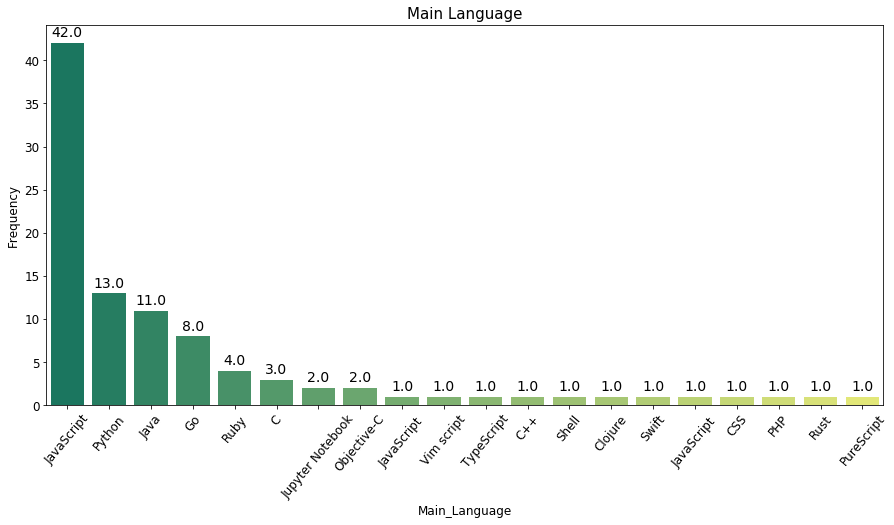

In [11]:
# Check the quality attribution of cleaned data
value_counts = user.Main_Language.value_counts()
target_counts = pd.DataFrame({'Main_Language': list(value_counts.index), 'value_count': value_counts})
plt.figure(figsize=(15,7))
g = sns.barplot(x='Main_Language', y='value_count', data=target_counts, capsize=0.3, palette='summer')
g.set_title("Main Language", fontsize=15)
g.set_xlabel("Main_Language", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
plt.xticks(rotation=50)
for p in g.patches:
    g.annotate(p.get_height(), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', fontsize=14, color='black')

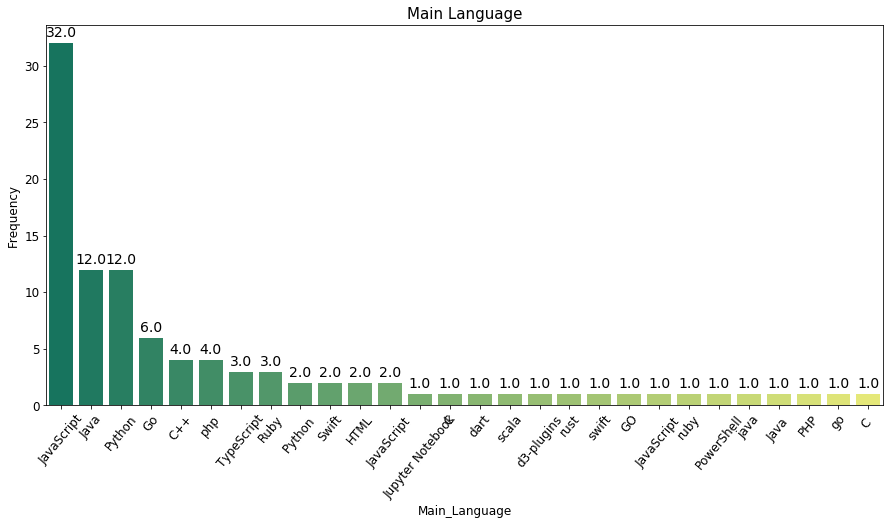

In [12]:
# Check the quality attribution of cleaned data
value_counts = org.Main_Language.value_counts()
target_counts = pd.DataFrame({'Main_Language': list(value_counts.index), 'value_count': value_counts})
plt.figure(figsize=(15,7))
g = sns.barplot(x='Main_Language', y='value_count', data=target_counts, capsize=0.3, palette='summer')
g.set_title("Main Language", fontsize=15)
g.set_xlabel("Main_Language", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
plt.xticks(rotation=50)
for p in g.patches:
    g.annotate(p.get_height(), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', fontsize=14, color='black')